# Unstructured API: Partition endpoint, VLM Strategy

Examples on how to use the VLM Strategy with specific VLM models - so that you can send a local file to the VLM partitioner endpoint and review the results

## Setting up

link to find your API key: https://platform.unstructured.io/app/account/api-keys

In [ ]:
#Some pip installs to visualize the pdf pages directly in the notebook:
!pip install pdf2image
!apt-get install poppler-utils

In [ ]:
import requests
import os
from google.colab import userdata

# Platform Partition URL
API_URL = "https://api.unstructuredapp.io/general/v0/general"
# My API key loaded from Google Colab Secrets
UNSTRUCTURED_API_KEY = userdata.get("UNSTRUCTURED_API_KEY")

We'll use a tiny portion of Walmart's S3 Filings as our Data, downloading them from a public Google Drive directory

In [ ]:
!gdown --id 1_MSL_HuqOj5p1OfAA4rFO_i2iuQT4F6U
!gdown --id 1cDliz8iKtCmvZ-QjlBWx8NXvcCmqLLek
!gdown --id 1wPcEWSdwKckIQ6jTgQ3z6Ezj3XiqSiJN


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_MSL_HuqOj5p1OfAA4rFO_i2iuQT4F6U
To: /content/Page-Check1.png
100% 157k/157k [00:00<00:00, 70.7MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1cDliz8iKtCmvZ-QjlBWx8NXvcCmqLLek
To: /content/1. Walmart, Inc-28-29.pdf
100% 126k/126k [00:00<00:00, 64.0MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From

All the models we support in VLM strategy as (vlm_model_provider, vlm_model) pairs:

In [ ]:
MODELS = [
    ("anthropic", "claude-3-5-sonnet-20241022"),
    ("azure_openai", "gpt-4o"),
    ("openai", "gpt-4o"),
    ("google", "gemini-1.5-pro"),
    ("vertexai", "gemini-2.0-flash-001"),
    ("anthropic_bedrock", "claude-3-5-sonnet-20241022"),
    ("bedrock", "us.amazon.nova-pro-v1:0"),
    ("bedrock", "us.amazon.nova-lite-v1:0"),
    ("bedrock", "us.anthropic.claude-3-5-sonnet-20241022-v2:0"),
    ("bedrock", "us.anthropic.claude-3-opus-20240229-v1:0"),
    ("bedrock", "us.anthropic.claude-3-haiku-20240307-v1:0"),
    ("bedrock", "us.anthropic.claude-3-sonnet-20240229-v1:0"),
    ("bedrock", "us.meta.llama3-2-90b-instruct-v1:0"),
    ("bedrock", "us.meta.llama3-2-11b-instruct-v1:0"),
]

All the file types we support as file extensions:

In [ ]:
FILE_TYPES = ["pdf", "jpg", "jpeg", "png", "tiff", "ppt", "pptx"]

In [ ]:
headers = {"accept": "application/json", "unstructured-api-key": UNSTRUCTURED_API_KEY}

## Example 1: Anthropic VLM model to Partition a PDF file

In [ ]:
provider, model = MODELS[0]
filename = "1. Walmart, Inc-28-29.pdf"
data = {"strategy": "vlm", "vlm_model_provider": provider, "vlm_model": model}
with open(filename,'rb') as f:
    files = {"files": (filename, f)}
    response = requests.post(API_URL, headers=headers, files=files, data=data)
    print(f"Response Code for {provider} - {model}: {response.status_code}")

Response Code for anthropic - claude-3-5-sonnet-20241022: 200


In [ ]:
# JSON response
response.json()

[{'type': 'UncategorizedText',
  'element_id': '6b37173e9c5180e77bfe620773f2ef81',
  'text': '',
  'metadata': {'category_depth': 0,
   'page_number': 1,
   'text_as_html': '<div class="Page" data-page-number="1" id="bf31f53d1a6a4ffb8d90d258f1ec5bb2" />',
   'languages': ['eng'],
   'filetype': 'application/pdf',
   'partitioner_type': 'vlm_partition',
   'filename': '1. Walmart, Inc-28-29.pdf'}},
 {'type': 'Title',
  'element_id': 'a51a01499650de1d1f6ac2a781fb31ff',
  'text': 'ITEM 2. PROPERTIES',
  'metadata': {'category_depth': 1,
   'page_number': 1,
   'parent_id': 'bf31f53d1a6a4ffb8d90d258f1ec5bb2',
   'text_as_html': '<h2 class="Subtitle" id="fb2cbc8c8c9b4d90bb65b0dca71b6bdd">ITEM 2. PROPERTIES</h2>',
   'languages': ['eng'],
   'filetype': 'application/pdf',
   'partitioner_type': 'vlm_partition',
   'filename': '1. Walmart, Inc-28-29.pdf'}},
 {'type': 'Title',
  'element_id': 'a196728783b563946cf723fbb0136b46',
  'text': 'United States',
  'metadata': {'category_depth': 1,
   

In [ ]:
# Number of elements
len(response.json())

21

In [ ]:
# Type of each element
from collections import Counter
Counter([e["type"] for e in response.json()])

Counter({'UncategorizedText': 8,
         'Title': 4,
         'NarrativeText': 3,
         'Table': 4,
         'PageNumber': 2})

Lets view the table from Page 1 of our PDF:

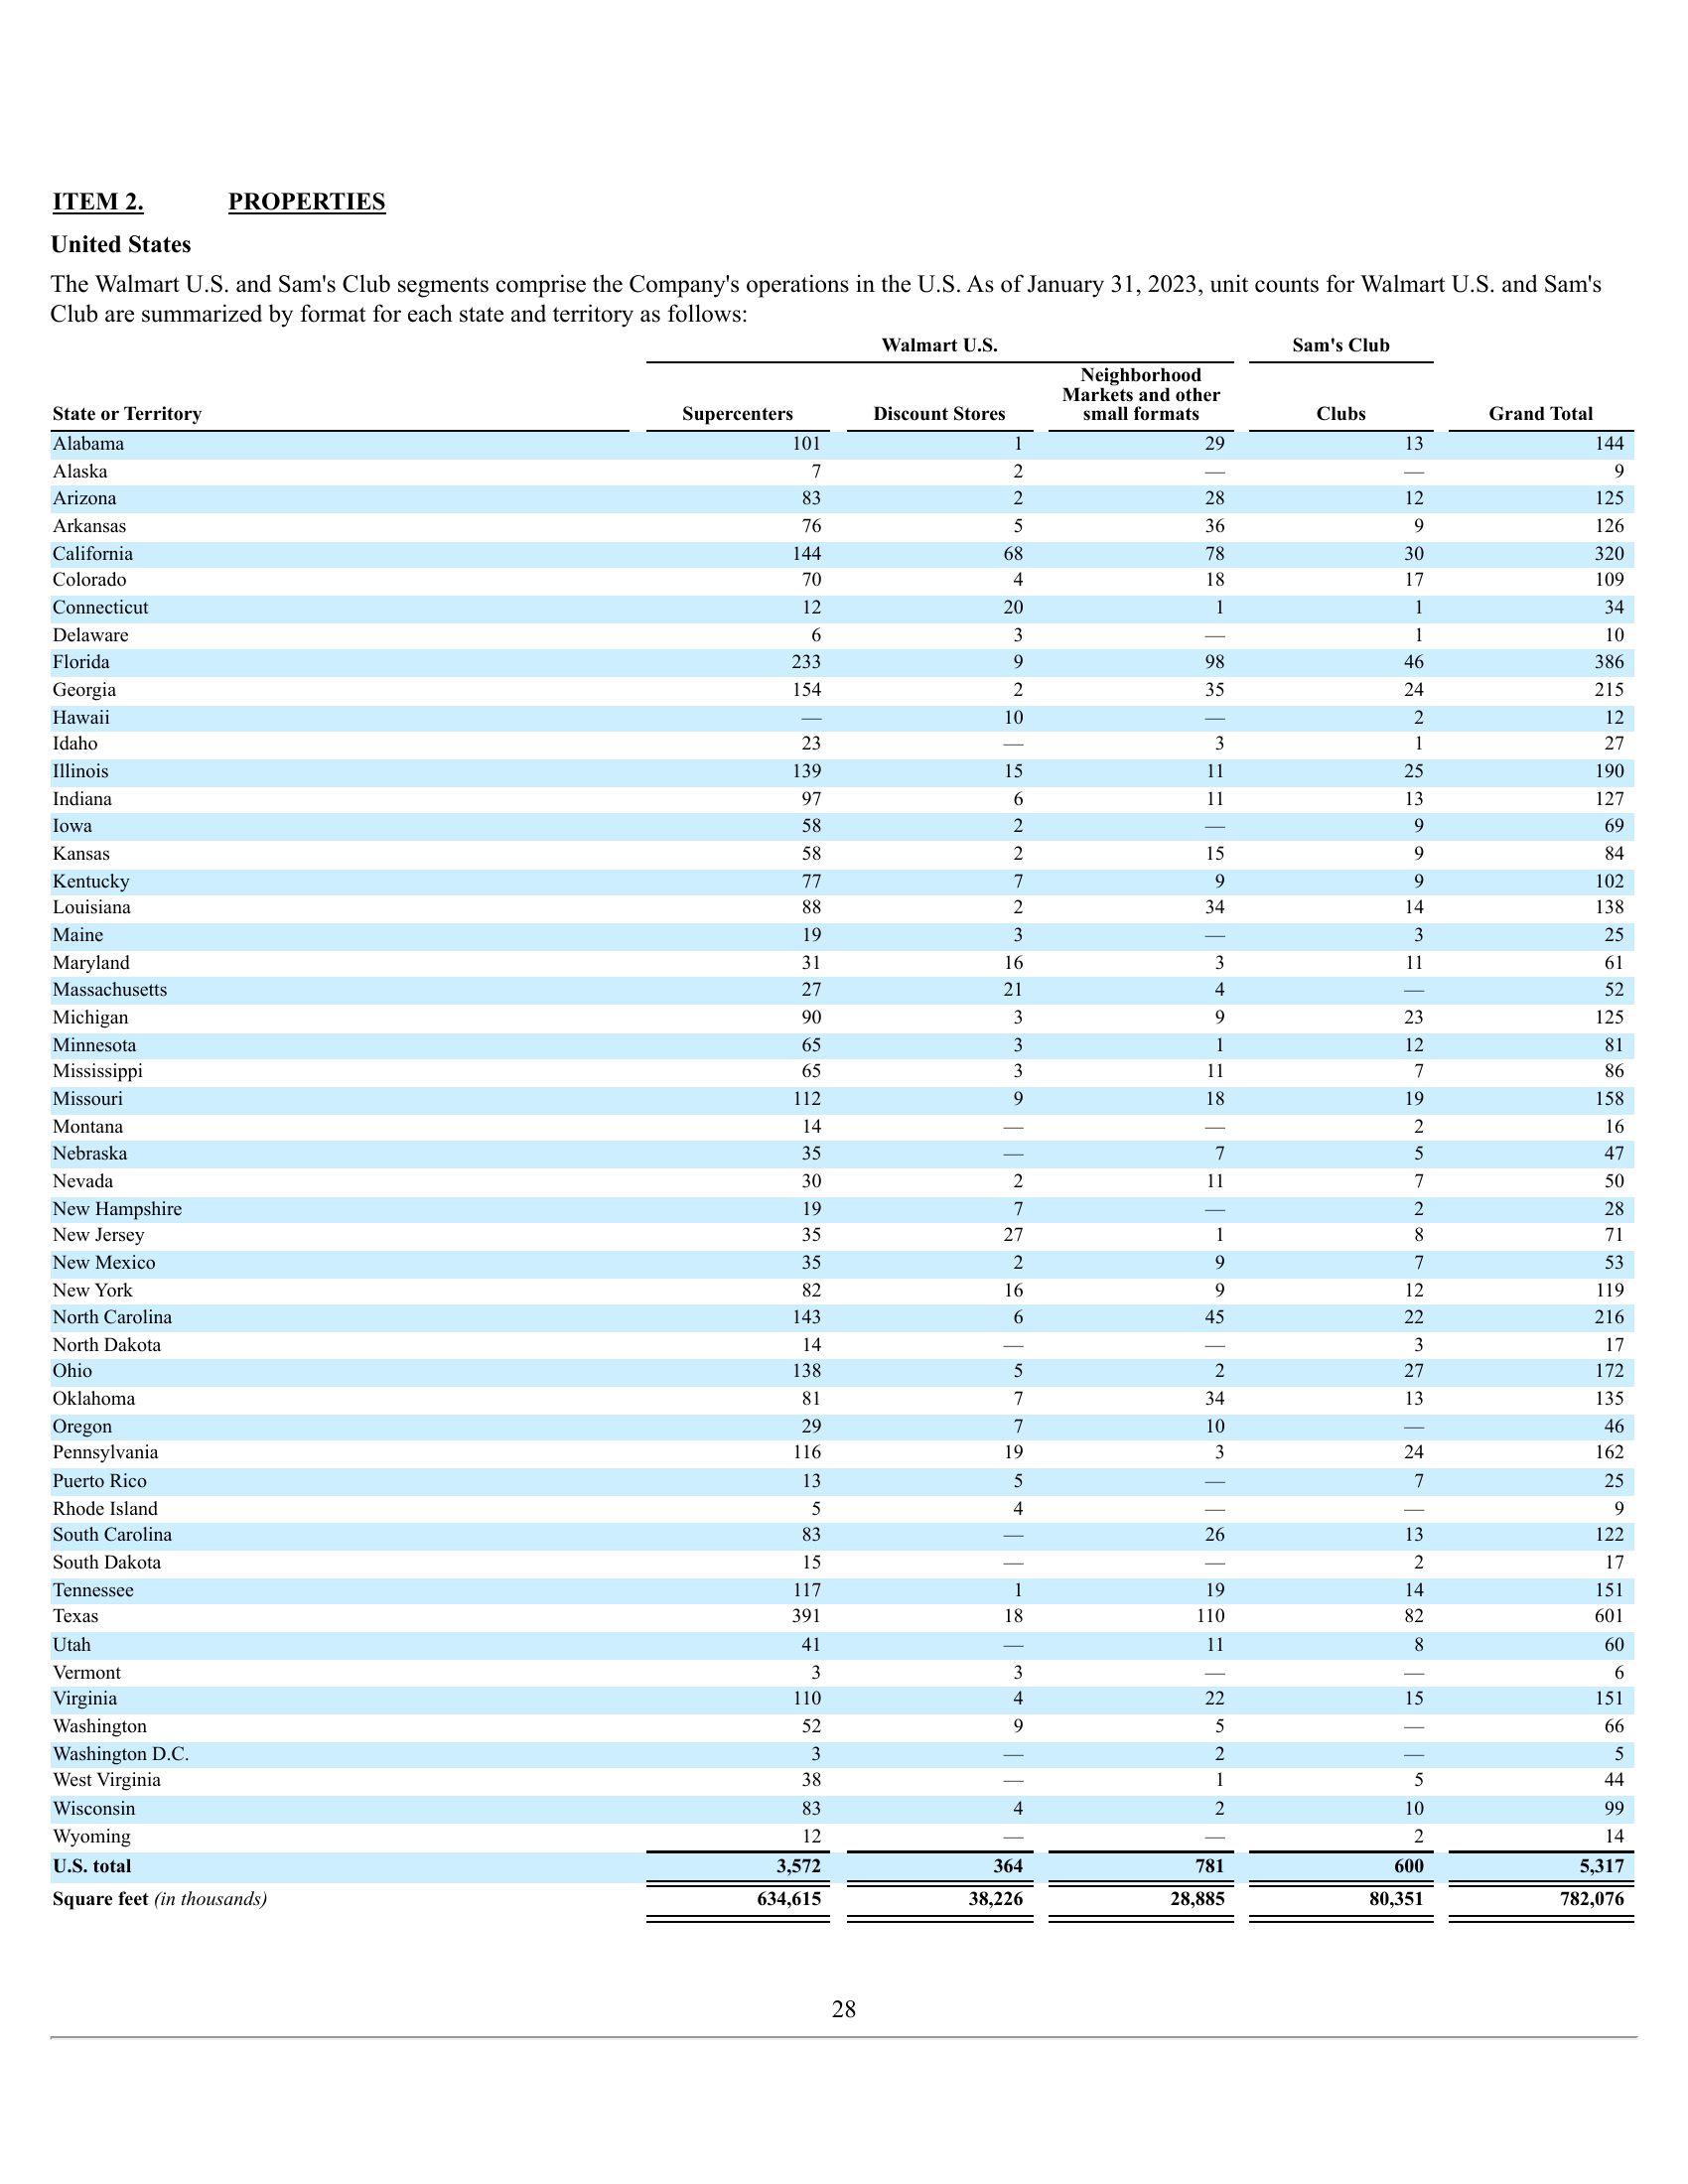

In [ ]:
from pdf2image import convert_from_path
from IPython.display import display
from PIL import Image

# Convert the first page to an image
pages = convert_from_path(filename, first_page=1, last_page=1)

# Display the first page
display(pages[0])

Now let's take a look at the information we extracted via Unstructured Platform API - we will view it in Markdown since we wrapped the table contents in html

In [ ]:
from IPython.display import Markdown, display
display(Markdown(response.json()[4]['metadata']['text_as_html']))

<table class="Table" id="55b3e5fd60b146a3956246d546171cfc"><thead><tr><th rowspan="2">State or Territory</th><th colspan="3">Walmart U.S.</th><th>Sam's Club</th><th rowspan="2">Grand Total</th></tr><tr><th>Supercenters</th><th>Discount Stores</th><th>Neighborhood Markets and other small formats</th><th>Clubs</th></tr></thead><tbody><tr><td>Alabama</td><td>101</td><td>1</td><td>29</td><td>13</td><td>144</td></tr><tr><td>Alaska</td><td>7</td><td>2</td><td>—</td><td>—</td><td>9</td></tr><tr><td>Arizona</td><td>83</td><td>2</td><td>28</td><td>12</td><td>125</td></tr><tr><td>Arkansas</td><td>76</td><td>5</td><td>36</td><td>9</td><td>126</td></tr><tr><td>California</td><td>144</td><td>68</td><td>78</td><td>30</td><td>320</td></tr><tr><td>Colorado</td><td>70</td><td>4</td><td>18</td><td>17</td><td>109</td></tr><tr><td>Connecticut</td><td>12</td><td>20</td><td>1</td><td>1</td><td>34</td></tr><tr><td>Delaware</td><td>6</td><td>3</td><td>—</td><td>1</td><td>10</td></tr><tr><td>Florida</td><td>233</td><td>9</td><td>98</td><td>46</td><td>386</td></tr><tr><td>Georgia</td><td>154</td><td>2</td><td>35</td><td>24</td><td>215</td></tr><tr><td>Hawaii</td><td>—</td><td>10</td><td>—</td><td>2</td><td>12</td></tr><tr><td>Idaho</td><td>23</td><td>—</td><td>3</td><td>1</td><td>27</td></tr><tr><td>Illinois</td><td>139</td><td>15</td><td>11</td><td>25</td><td>190</td></tr><tr><td>Indiana</td><td>97</td><td>6</td><td>11</td><td>13</td><td>127</td></tr><tr><td>Iowa</td><td>58</td><td>2</td><td>—</td><td>9</td><td>69</td></tr><tr><td>Kansas</td><td>58</td><td>2</td><td>15</td><td>9</td><td>84</td></tr><tr><td>Kentucky</td><td>77</td><td>7</td><td>9</td><td>9</td><td>102</td></tr><tr><td>Louisiana</td><td>88</td><td>2</td><td>34</td><td>14</td><td>138</td></tr><tr><td>Maine</td><td>19</td><td>3</td><td>—</td><td>3</td><td>25</td></tr><tr><td>Maryland</td><td>31</td><td>16</td><td>3</td><td>11</td><td>61</td></tr><tr><td>Massachusetts</td><td>27</td><td>21</td><td>4</td><td>—</td><td>52</td></tr><tr><td>Michigan</td><td>90</td><td>3</td><td>9</td><td>23</td><td>125</td></tr><tr><td>Minnesota</td><td>65</td><td>3</td><td>1</td><td>12</td><td>81</td></tr><tr><td>Mississippi</td><td>65</td><td>3</td><td>11</td><td>7</td><td>86</td></tr><tr><td>Missouri</td><td>112</td><td>9</td><td>18</td><td>19</td><td>158</td></tr><tr><td>Montana</td><td>14</td><td>—</td><td>—</td><td>2</td><td>16</td></tr><tr><td>Nebraska</td><td>35</td><td>—</td><td>7</td><td>5</td><td>47</td></tr><tr><td>Nevada</td><td>30</td><td>2</td><td>11</td><td>7</td><td>50</td></tr><tr><td>New Hampshire</td><td>19</td><td>7</td><td>—</td><td>2</td><td>28</td></tr><tr><td>New Jersey</td><td>35</td><td>27</td><td>1</td><td>8</td><td>71</td></tr><tr><td>New Mexico</td><td>35</td><td>2</td><td>9</td><td>7</td><td>53</td></tr><tr><td>New York</td><td>82</td><td>16</td><td>9</td><td>12</td><td>119</td></tr><tr><td>North Carolina</td><td>143</td><td>6</td><td>45</td><td>22</td><td>216</td></tr><tr><td>North Dakota</td><td>14</td><td>—</td><td>—</td><td>3</td><td>17</td></tr><tr><td>Ohio</td><td>138</td><td>5</td><td>2</td><td>27</td><td>172</td></tr><tr><td>Oklahoma</td><td>81</td><td>7</td><td>34</td><td>13</td><td>135</td></tr><tr><td>Oregon</td><td>29</td><td>7</td><td>10</td><td>—</td><td>46</td></tr><tr><td>Pennsylvania</td><td>116</td><td>19</td><td>3</td><td>24</td><td>162</td></tr><tr><td>Puerto Rico</td><td>13</td><td>5</td><td>—</td><td>7</td><td>25</td></tr><tr><td>Rhode Island</td><td>5</td><td>4</td><td>—</td><td>—</td><td>9</td></tr><tr><td>South Carolina</td><td>83</td><td>—</td><td>26</td><td>13</td><td>122</td></tr><tr><td>South Dakota</td><td>15</td><td>—</td><td>—</td><td>2</td><td>17</td></tr><tr><td>Tennessee</td><td>117</td><td>1</td><td>19</td><td>14</td><td>151</td></tr><tr><td>Texas</td><td>391</td><td>18</td><td>110</td><td>82</td><td>601</td></tr><tr><td>Utah</td><td>41</td><td>—</td><td>11</td><td>8</td><td>60</td></tr><tr><td>Vermont</td><td>3</td><td>3</td><td>—</td><td>—</td><td>6</td></tr><tr><td>Virginia</td><td>110</td><td>4</td><td>22</td><td>15</td><td>151</td></tr><tr><td>Washington</td><td>52</td><td>9</td><td>5</td><td>—</td><td>66</td></tr><tr><td>Washington D.C.</td><td>3</td><td>—</td><td>2</td><td>—</td><td>5</td></tr><tr><td>West Virginia</td><td>38</td><td>—</td><td>1</td><td>5</td><td>44</td></tr><tr><td>Wisconsin</td><td>83</td><td>4</td><td>2</td><td>10</td><td>99</td></tr><tr><td>Wyoming</td><td>12</td><td>—</td><td>—</td><td>2</td><td>14</td></tr><tr><td>U.S. total</td><td>3,572</td><td>364</td><td>781</td><td>600</td><td>5,317</td></tr><tr><td>Square feet (in thousands)</td><td>634,615</td><td>38,226</td><td>28,885</td><td>80,351</td><td>782,076</td></tr></tbody></table>

## Example 2: GPT-4o to Partition the same PDF file

In [ ]:
provider, model = MODELS[1]
filename = "1. Walmart, Inc-28-29.pdf"
data = {"strategy": "vlm", "vlm_model_provider": provider, "vlm_model": model}
with open(filename,'rb') as f:
    files = {"files": (filename, f)}
    response = requests.post(API_URL, headers=headers, files=files, data=data)
    print(f"Response Code for {provider} - {model}: {response.status_code}")

Response Code for azure_openai - gpt-4o: 200


In [ ]:
# JSON response
response.json()

[{'type': 'UncategorizedText',
  'element_id': '6b37173e9c5180e77bfe620773f2ef81',
  'text': '',
  'metadata': {'category_depth': 0,
   'page_number': 1,
   'text_as_html': '<div class="Page" data-page-number="1" id="3451580740184b27a0276f8ee0668484" />',
   'languages': ['eng'],
   'filetype': 'application/pdf',
   'partitioner_type': 'vlm_partition',
   'filename': '1. Walmart, Inc-28-29.pdf'}},
 {'type': 'Title',
  'element_id': 'a51a01499650de1d1f6ac2a781fb31ff',
  'text': 'ITEM 2. PROPERTIES',
  'metadata': {'category_depth': 1,
   'page_number': 1,
   'parent_id': '3451580740184b27a0276f8ee0668484',
   'text_as_html': '<h2 class="Subtitle" id="01e0700c0be64d7cb50e581b4a35eca6">ITEM 2. PROPERTIES</h2>',
   'languages': ['eng'],
   'filetype': 'application/pdf',
   'partitioner_type': 'vlm_partition',
   'filename': '1. Walmart, Inc-28-29.pdf'}},
 {'type': 'Title',
  'element_id': 'a196728783b563946cf723fbb0136b46',
  'text': 'United States',
  'metadata': {'category_depth': 1,
   

In [ ]:
# Number of elements
len(response.json())

21

In [ ]:
# Type of each element
from collections import Counter
Counter([e["type"] for e in response.json()])

Counter({'UncategorizedText': 8,
         'Title': 4,
         'NarrativeText': 3,
         'Table': 4,
         'PageNumber': 2})

Viewing page 2 of the file:

![Page 2](https://drive.google.com/uc?id=1_MSL_HuqOj5p1OfAA4rFO_i2iuQT4F6U)



In [ ]:
# Viewing everything from Page 2
page_specific_resps = []
for resp in response.json():
  if resp['metadata']['page_number'] == 2:
    page_specific_resps.append(resp)

page_specific_resps
for resp in page_specific_resps:
  if resp['type'] != 'Table':
    print(resp['text'])
  else:
    display(Markdown(resp['metadata']['text_as_html']))



International
The Walmart International segment comprises the Company's operations outside of the U.S. Unit counts as of January 31, 2023 (1) for Walmart International are summarized by major category for each geographic market as follows:


<table class="Table" id="9be1f40dc3c14f32b3f042e9ef06a95c"><thead><tr><th>Geographic Market</th><th>Retail</th><th>Wholesale</th><th>Total</th><th><p>Square feet</p><span>(2)</span></th></tr></thead><tbody><tr><td><p>Africa</p><span>(3)</span></td><td>289</td><td>86</td><td>375</td><td>20,939</td></tr><tr><td>Canada</td><td>402</td><td>—</td><td>402</td><td>52,557</td></tr><tr><td><p>Central America</p><span>(4)</span></td><td>882</td><td>—</td><td>882</td><td>13,996</td></tr><tr><td>Chile</td><td>379</td><td>13</td><td>392</td><td>17,688</td></tr><tr><td>China</td><td>322</td><td>43</td><td>365</td><td>60,331</td></tr><tr><td>India</td><td>—</td><td>28</td><td>28</td><td>1,527</td></tr><tr><td>Mexico</td><td>2,694</td><td>168</td><td>2,862</td><td>106,412</td></tr><tr><td>International total</td><td>4,968</td><td>338</td><td>5,306</td><td>273,450</td></tr></tbody></table>

(1) Walmart International unit counts, with the exception of Canada, are as of December 31, 2022, to correspond with the balance sheet date of the related geographic market. Canada unit counts are as of January 31, 2023.
(2) Square feet reported in thousands.
(3) Africa unit counts primarily reside in South Africa, with other locations in Botswana, Kenya, Lesotho, Malawi, Mozambique, Namibia, Swaziland, and Zambia.
(4) Central America unit counts reside in Costa Rica, El Salvador, Guatemala, Honduras and Nicaragua.
Owned and Leased Properties
The following table provides further details of our retail units and distribution facilities, including return facilities and dedicated eCommerce fulfillment centers, as of January 31, 2023 (1) :


<table class="Table" id="1edc95f0993049ed94f3c6b98f5630fe"><thead><tr><th></th><th>Owned</th><th><p>Leased</p><span>(2)</span></th><th>Total</th></tr></thead><tbody><tr><td colspan="4">U.S. properties</td></tr><tr><td>Walmart U.S. retail units</td><td>4,057</td><td>660</td><td>4,717</td></tr><tr><td>Sam's Club retail units</td><td>513</td><td>87</td><td>600</td></tr><tr><td>Total U.S. retail units</td><td>4,570</td><td>747</td><td>5,317</td></tr><tr><td>Walmart U.S. distribution facilities</td><td>110</td><td>53</td><td>163</td></tr><tr><td>Sam's Club distribution facilities</td><td>12</td><td>17</td><td>29</td></tr><tr><td>Total U.S. distribution facilities</td><td>122</td><td>70</td><td>192</td></tr><tr><td>Total U.S. properties</td><td>4,692</td><td>817</td><td>5,509</td></tr><tr><td colspan="4">International properties</td></tr><tr><td>Africa</td><td>33</td><td>342</td><td>375</td></tr><tr><td>Canada</td><td>124</td><td>278</td><td>402</td></tr><tr><td>Central America</td><td>380</td><td>502</td><td>882</td></tr><tr><td>Chile</td><td>205</td><td>187</td><td>392</td></tr><tr><td>China</td><td>2</td><td>363</td><td>365</td></tr><tr><td>India</td><td>2</td><td>26</td><td>28</td></tr><tr><td>Mexico</td><td>710</td><td>2,152</td><td>2,862</td></tr><tr><td>Total International retail units</td><td>1,456</td><td>3,850</td><td>5,306</td></tr><tr><td>International distribution facilities</td><td>23</td><td>165</td><td>188</td></tr><tr><td>Total International properties</td><td>1,479</td><td>4,015</td><td>5,494</td></tr><tr><td>Total properties</td><td>6,171</td><td>4,832</td><td>11,003</td></tr></tbody></table>

<table class="Table" id="996c36cfd5ad45e79c5e0ac1e451f0c0"><tbody><tr><td>Total retail units</td><td>6,026</td><td>4,597</td><td>10,623</td></tr><tr><td>Total distribution facilities</td><td>145</td><td>235</td><td>380</td></tr><tr><td>Total properties</td><td>6,171</td><td>4,832</td><td>11,003</td></tr></tbody></table>

(1) Walmart International properties, with the exception of Canada, are as of December 31, 2022, to correspond with the balance sheet date of the related geographic market. Canada unit counts are as of January 31, 2023.
(2) Also includes U.S. and international distribution facilities which are third-party owned and operated.
29


## Example 3: the same GPT-4o model to Partition a Image file

In [ ]:
provider, model = MODELS[1]
filename = "Graph-Check1.png"
data = {"strategy": "vlm", "vlm_model_provider": provider, "vlm_model": model}
with open(filename, "rb") as f:
    files = {"files": (filename, f)}
    response = requests.post(API_URL, headers=headers, files=files, data=data)
    print(f"Response Code for {provider} - {model}: {response.status_code}")

Response Code for azure_openai - gpt-4o: 200


In [ ]:
# JSON response
response.json()

[{'type': 'UncategorizedText',
  'element_id': '6b37173e9c5180e77bfe620773f2ef81',
  'text': '',
  'metadata': {'category_depth': 0,
   'page_number': 1,
   'text_as_html': '<div class="Page" data-page-number="1" id="175d348971744b24807a567f77155c93" />',
   'languages': ['eng'],
   'filetype': 'image/png',
   'partitioner_type': 'vlm_partition',
   'filename': 'Graph-Check1.png'}},
 {'type': 'Title',
  'element_id': 'de4336b5467e3b1e9107f25dd11e9e08',
  'text': 'Stock Performance Chart',
  'metadata': {'category_depth': 1,
   'page_number': 1,
   'parent_id': '175d348971744b24807a567f77155c93',
   'text_as_html': '<h1 class="Title" id="89f3898d94734d5cb90ddd7653c27b4f">Stock Performance Chart</h1>',
   'languages': ['eng'],
   'filetype': 'image/png',
   'partitioner_type': 'vlm_partition',
   'filename': 'Graph-Check1.png'}},
 {'type': 'NarrativeText',
  'element_id': '2d6fe3feb5eee0c41568a448ef22aaf6',
  'text': "This graph compares the cumulative total shareholder return on Walmart

In [ ]:
# Number of elements
len(response.json())

4

In [ ]:
# Type of each element
[e["type"] for e in response.json()]

['UncategorizedText', 'Title', 'NarrativeText', 'Image']

![Graph](https://drive.google.com/uc?id=1wPcEWSdwKckIQ6jTgQ3z6Ezj3XiqSiJN)



In [ ]:
import textwrap

for resp in response.json():
    if resp['type'] != 'Image':
        text = resp['text']
    else:
        text = f"Image Description: {resp['text']}"

    # Wrap text to a maximum width (e.g., 80 characters per line)
    wrapped_text = textwrap.fill(text, width=80)

    print(wrapped_text)
    print()  # Add an extra line for better readability




Stock Performance Chart

This graph compares the cumulative total shareholder return on Walmart's common
stock during the five fiscal years ended through fiscal 2023 to the cumulative
total returns on the S&P 500 Retailing Index and the S&P 500 Index. The
comparison assumes $100 was invested on February 1, 2018 in shares of our common
stock and in each of the indices shown and assumes that all of the dividends
were reinvested.

Image Description: Line graph showing comparison of 5 year cumulative total
return among Walmart Inc., S&amp;P 500 Index, and S&amp;P 500 Retailing Index
from 2018 to 2023. The graph shows three lines tracking performance starting at
$100 in 2018. By 2023, Walmart&#x27;s line ends around $150, while both indices
show slightly higher returns around $160-170. COMPARISON OF 5 YEAR CUMULATIVE
TOTAL RETURN* Among Walmart Inc., the S&P 500 Index and S&P 500 Retailing Index
(Fiscal Years Ended January 31)

